<a href="https://colab.research.google.com/github/sikander545454/Applied-modelling/blob/main/Applied_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PPDAC Model**

## Problem

The goal of this project is to analyze the factors affecting passenger satisfaction at Marjanta Airlines using a large dataset of passenger feedback

## Plan


**Approach:**To solve this problem, we will use two machine learning models to predict passenger satisfaction. The chosen models are Logistic Regression and Random Forest, as they provide robust techniques for classification and are commonly used for customer satisfaction analysis.


**Steps:**
Conduct Exploratory Data Analysis (EDA) to identify trends and relationships in the data.
Implement a data preprocessing pipeline (Extract, Transform, Load) to clean and prepare the data.
Train and test two machine learning models, evaluating their performance using appropriate metrics.
Provide visualizations to communicate key findings and model performance to stakeholders.

**Evaluation Metrics:**
We will use accuracy, precision, and F1-score to evaluate the models, along with ROC-AUC for measuring classification performanc

## Data Loading

### Mount Drive

In [ ]:
# Import Google Drive module from Colab
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import warnings

# Suppress warning messages
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/Airline_dataset.csv', encoding='latin1')
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


## Data Cleaning

In [ ]:
# Step 1: Handle missing values by filling with median arrival delay
missing_values_before = data.isnull().sum()
median_arrival_delay = data['Arrival Delay in Minutes'].median()
data['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)
missing_values_after = data.isnull().sum()

# Step 2: Remove duplicate entries
duplicate_rows_before = data.duplicated().sum()
data.drop_duplicates(inplace=True)
duplicate_rows_after = data.duplicated().sum()

# Step 3: Check unique values in categorical columns for consistency
categorical_columns = ['Gender', 'Satisfied', 'Age Band', 'Type of Travel', 'Class', 'Destination', 'Continent']
unique_values = {col: data[col].unique() for col in categorical_columns}

# Step 4: Cap extreme delay times to handle outliers
upper_bound_delay = 600  # Upper limit for delays
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].clip(upper=upper_bound_delay)
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].clip(upper=upper_bound_delay)

# Outputs summary
output = {
    "Missing values before": missing_values_before[missing_values_before > 0],
    "Missing values after": missing_values_after[missing_values_after > 0],
    "Duplicate rows before": duplicate_rows_before,
    "Duplicate rows after": duplicate_rows_after,
    "Unique values in categorical columns": unique_values,
    "Capped delay times": {
        "Max Departure Delay": data['Departure Delay in Minutes'].max(),
        "Max Arrival Delay": data['Arrival Delay in Minutes'].max()
    }
}

output


{'Missing values before': Arrival Delay in Minutes    310
 dtype: int64,
 'Missing values after': Series([], dtype: int64),
 'Duplicate rows before': 0,
 'Duplicate rows after': 0,
 'Unique values in categorical columns': {'Gender': array(['Male', 'Female'], dtype=object),
  'Satisfied': array(['Y', 'N'], dtype=object),
  'Age Band': array(['Under 18', '25 to 34', '55 to 64', '45 to 54', '35 to 44',
         '18 to 24', '65 or over'], dtype=object),
  'Type of Travel': array(['Personal Travel', 'Business travel'], dtype=object),
  'Class': array(['Eco Plus', 'Business', 'Eco'], dtype=object),
  'Destination': array(['India', 'Republic of Ireland', 'Norway', 'Italy', 'San Marino',
         'Japan', 'Vatican City', 'Egypt', 'United Kingdom', 'Switzerland',
         'Svalbard', 'Cyprus', 'Croatia', 'Kosovo', 'California', 'Greece',
         'Slovenia', 'Iceland', 'Spain', 'Lithuania', 'France', 'Hong Kong',
         'São Tomé and Príncipe', 'Guinea', 'Jamaica', 'Portugal', 'Togo',
       

## Analysis

### EDA

Descriptive Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Select numerical columns for analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Display descriptive statistics for numerical columns
print("\n--- Descriptive Statistics for Numerical Columns ---\n")
print(data[numerical_columns].describe())



--- Descriptive Statistics for Numerical Columns ---

                 Ref             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      4164.071066   
std     29994.645522   37463.812252      15.114964      1346.755749   
min         0.000000       1.000000       7.000000       235.000000   
25%     25975.750000   32533.750000      27.000000      4760.000000   
50%     51951.500000   64856.500000      40.000000      4760.000000   
75%     77927.250000   97368.250000      51.000000      4760.000000   
max    103903.000000  129880.000000      85.000000      5940.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.522319                           3.060248   
std                 1.447848                           1.525143   
min                 0.000000         

Chi square Test

In [ ]:
# 2. Inferential Statistics

# Chi-Square tests for independence between categorical variables and 'Satisfied'
print("\n--- Chi-Square Tests for Categorical Columns by Satisfaction ---\n")
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Satisfied'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.2f}, p-value = {p:.5f}")
    if p < 0.05:
        print(f"Significant association between {col} and Satisfaction")
    print("\n")



--- Chi-Square Tests for Categorical Columns by Satisfaction ---

Gender: chi2 = 104.27, p-value = 0.00000
Significant association between Gender and Satisfaction


Satisfied: chi2 = 103897.30, p-value = 0.00000
Significant association between Satisfied and Satisfaction


Age Band: chi2 = 13468.01, p-value = 0.00000
Significant association between Age Band and Satisfaction


Type of Travel: chi2 = 9874.91, p-value = 0.00000
Significant association between Type of Travel and Satisfaction


Class: chi2 = 1584.51, p-value = 0.00000
Significant association between Class and Satisfaction


Destination: chi2 = 1052.52, p-value = 0.00000
Significant association between Destination and Satisfaction


Continent: chi2 = 161.67, p-value = 0.00000
Significant association between Continent and Satisfaction




Univariate

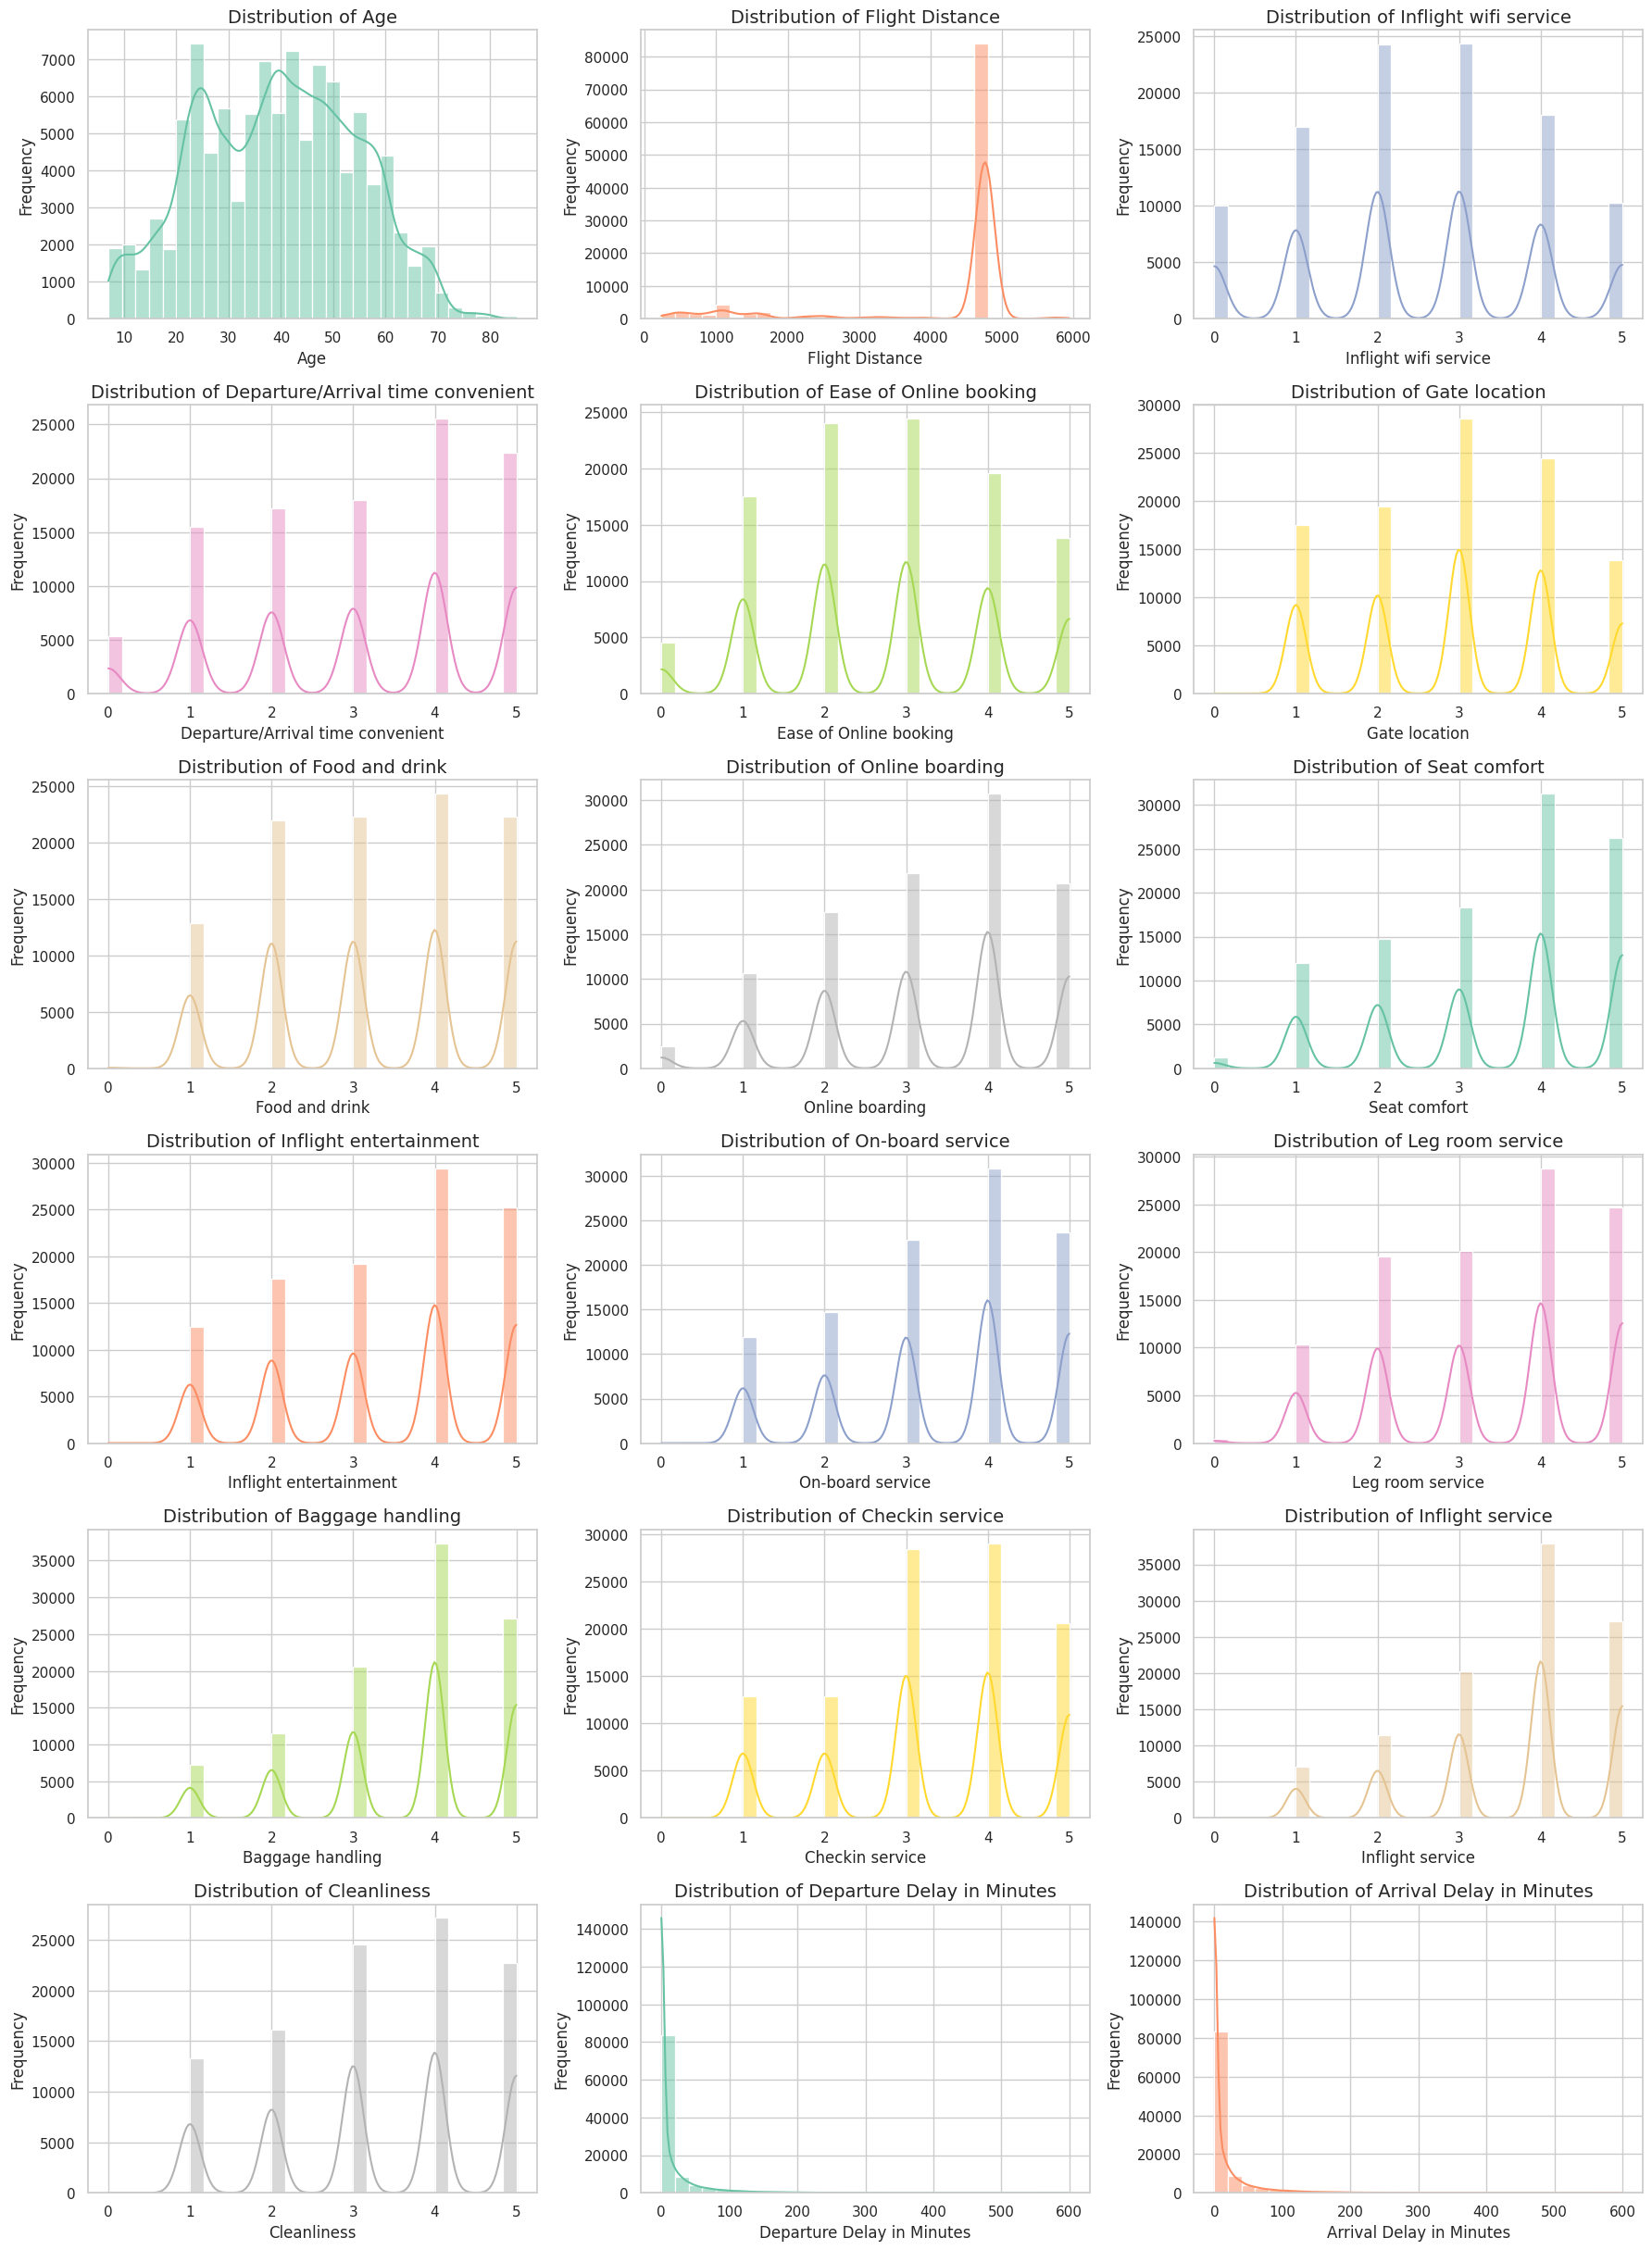

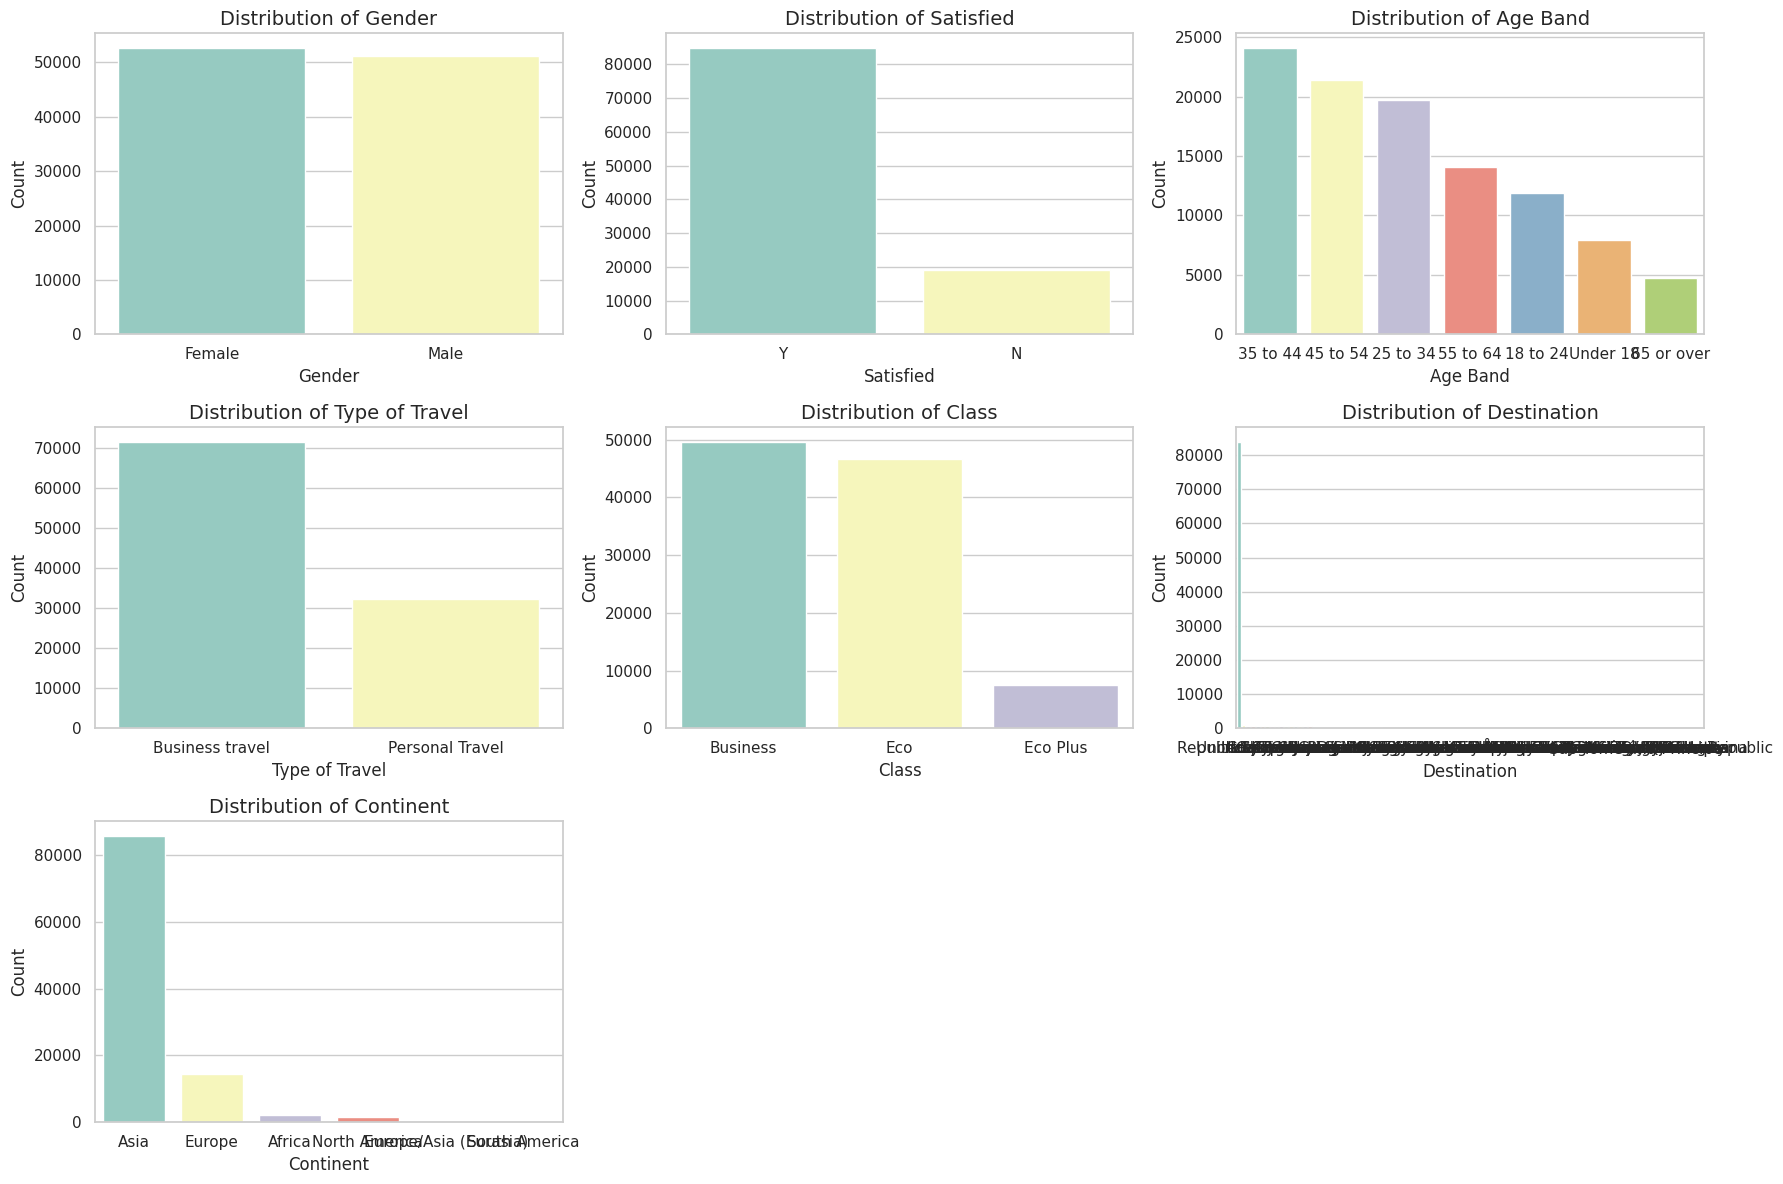

In [ ]:
# 3. Univariate Analysis
color_palette = sns.color_palette("Set2")


# Univariate Analysis for ALL numerical columns
numerical_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col not in ['id', 'Ref']]

# Univariate analysis: Plot distributions for all numerical columns
num_plots = len(numerical_columns)
rows = (num_plots // 3) + 1  # 3 plots per row

# Set up the grid layout for numerical columns
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=30, kde=True, color=color_palette[i % len(color_palette)], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Univariate analysis for ALL categorical features
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in ['id', 'Ref']]

num_plots = len(categorical_columns)
rows = (num_plots // 3) + 1  # 3 plots per row

# Set up the grid layout for categorical columns
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Bivariate

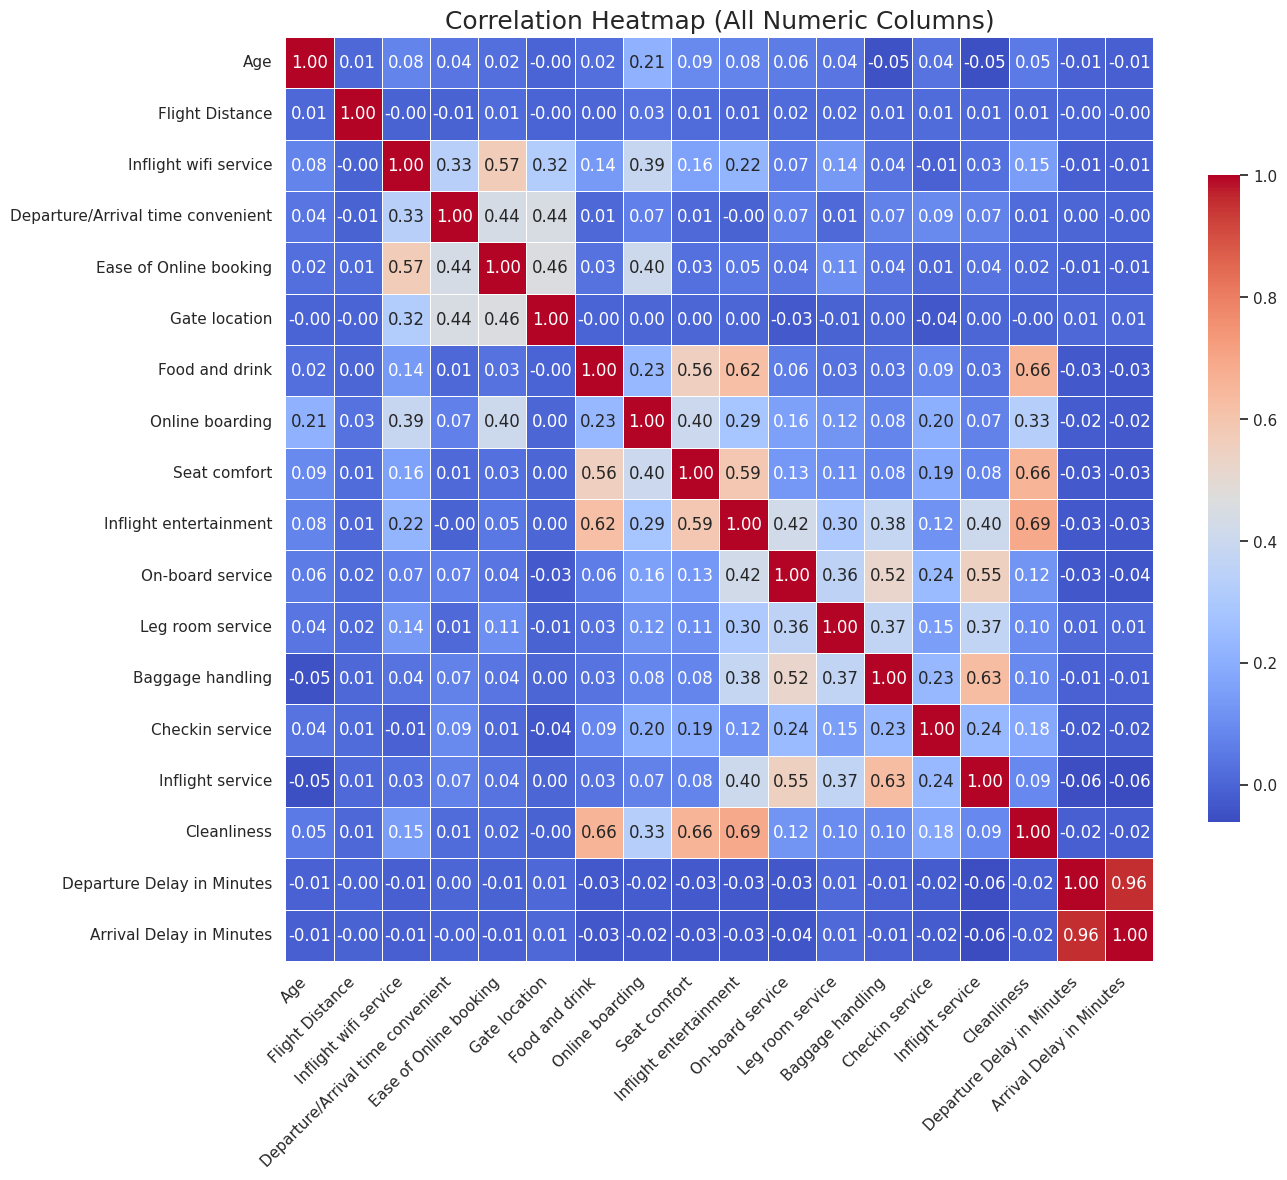

In [ ]:
# 4. Bivariate Analysis: Correlation Matrix and Heatmap for ALL numerical columns
numeric_data = data[numerical_columns]

# Compute the correlation matrix for all numerical columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap for all numerical features
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.7})
plt.title('Correlation Heatmap (All Numeric Columns)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()




Multivariate

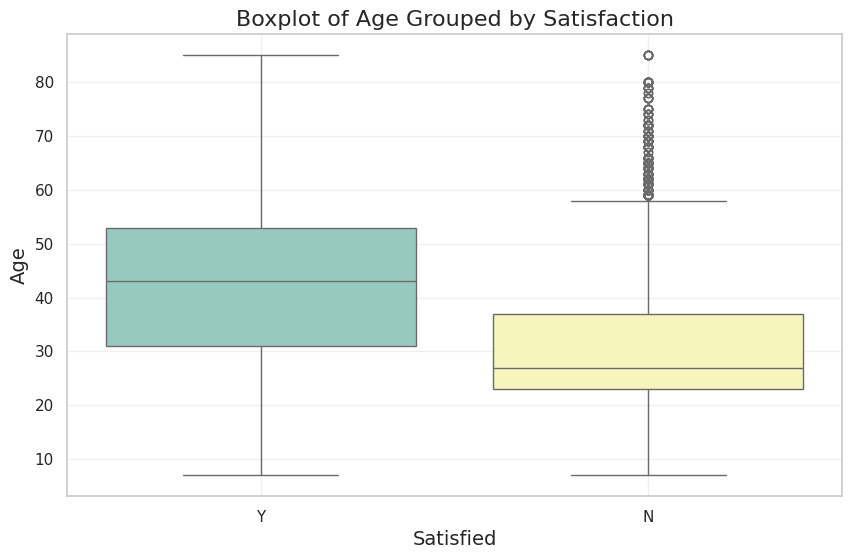

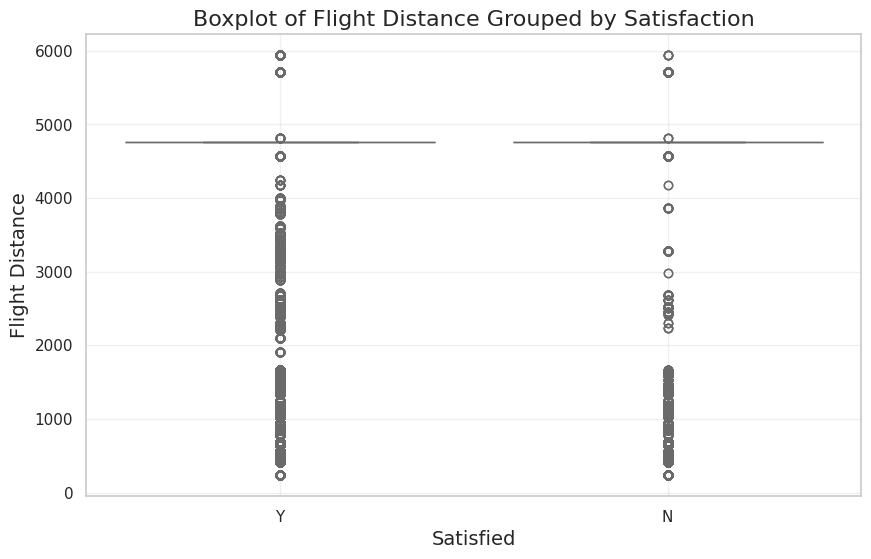

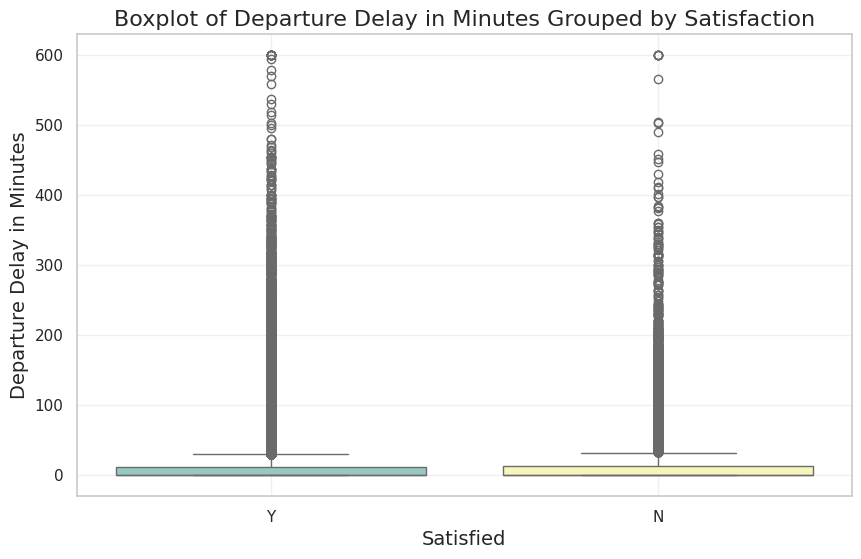

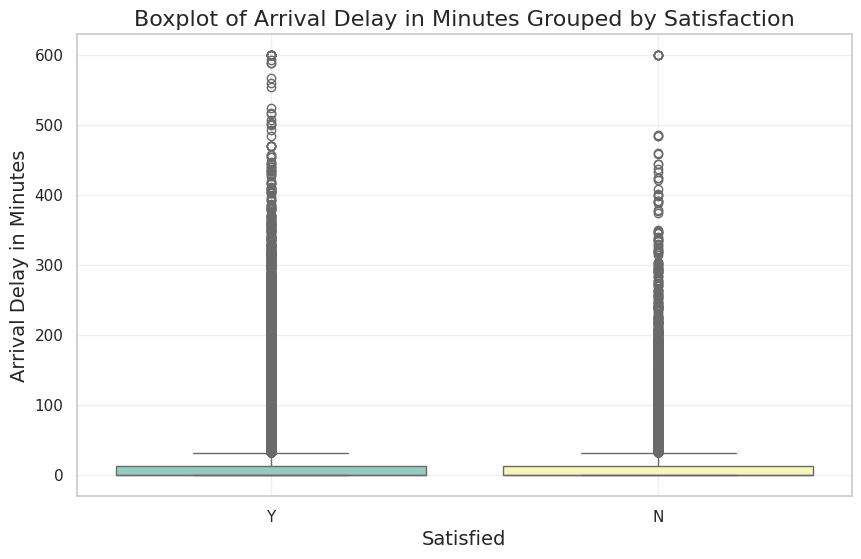

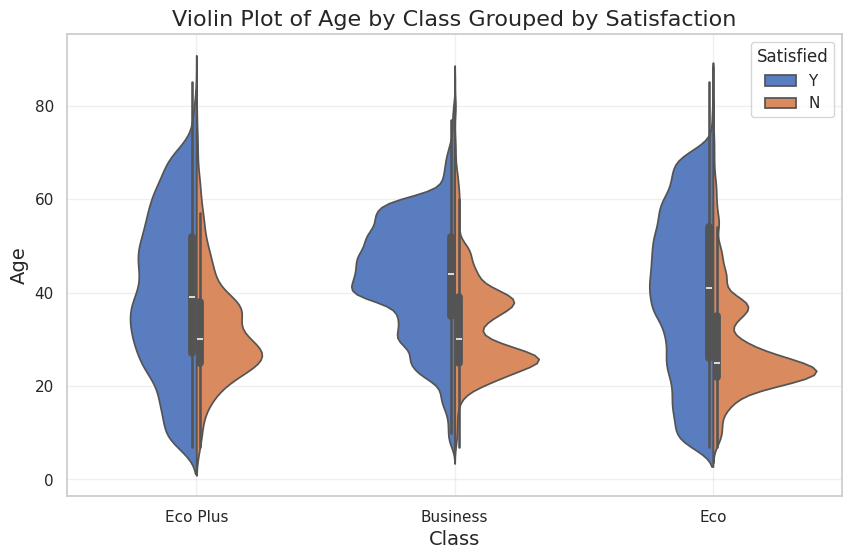

In [ ]:
# 5. Multivariate Analysis: Pairplot for ALL features against 'Satisfied'

# Boxplot to analyze 'Satisfaction' vs several numeric features
for feature in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Satisfied', y=feature, data=data, palette="Set3")
    plt.title(f'Boxplot of {feature} Grouped by Satisfaction', fontsize=16)
    plt.xlabel('Satisfied', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

# Violin Plot for distribution across 'Class' and 'Satisfaction'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Age', hue='Satisfied', data=data, split=True, palette="muted")
plt.title('Violin Plot of Age by Class Grouped by Satisfaction', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## Feature Engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Step 1: One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['Type of Travel', 'Class', 'Gender', 'Age Band'])

# Step 2: Create Age Category and one-hot encode it
bins = [0, 34, 54, 100]
labels = ['Young', 'Middle-aged', 'Senior']
encoded_data['Age Category'] = pd.cut(data['Age'], bins=bins, labels=labels)
encoded_data = pd.get_dummies(encoded_data, columns=['Age Category'], drop_first=True)

# Step 3: Bin and one-hot encode Departure and Arrival Delays
encoded_data['Departure Delay Category'] = pd.cut(
    data['Departure Delay in Minutes'],
    bins=[-1, 0, 60, 120, 300, 600],
    labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay', 'Extreme Delay']
)
encoded_data['Arrival Delay Category'] = pd.cut(
    data['Arrival Delay in Minutes'],
    bins=[-1, 0, 60, 120, 300, 600],
    labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay', 'Extreme Delay']
)
encoded_data = pd.get_dummies(encoded_data, columns=['Departure Delay Category', 'Arrival Delay Category'], drop_first=True)

# Step 4: Create interaction feature
if 'Class_Business' in encoded_data.columns and 'Type of Travel_Business travel' in encoded_data.columns:
    encoded_data['Class_TypeOfTravel'] = encoded_data['Class_Business'] * encoded_data['Type of Travel_Business travel']
else:
    print("Warning: Columns for interaction not found!")

# Step 5: Create Inflight Service Score as the average of related service ratings
service_columns = ['Seat comfort', 'Inflight entertainment', 'Food and drink', 'On-board service', 'Leg room service']
encoded_data['Inflight Service Score'] = data[service_columns].mean(axis=1)

# Drop original delay columns
encoded_data.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)

# Step 6: Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Flight Distance', 'Inflight Service Score']  # Include relevant numerical features
encoded_data[numerical_features] = scaler.fit_transform(encoded_data[numerical_features])


## Modelling

Logistic Regression Performance on Validation Set:
Accuracy: 0.9236
Confusion Matrix:
 [[ 2863   849]
 [  739 16330]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      3712
           1       0.95      0.96      0.95     17069

    accuracy                           0.92     20781
   macro avg       0.87      0.86      0.87     20781
weighted avg       0.92      0.92      0.92     20781


Random Forest Performance on Validation Set:
Accuracy: 0.9876
Confusion Matrix:
 [[ 3553   159]
 [   98 16971]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      3712
           1       0.99      0.99      0.99     17069

    accuracy                           0.99     20781
   macro avg       0.98      0.98      0.98     20781
weighted avg       0.99      0.99      0.99     20781

Logistic Regression Performance on Test Set:
Accuracy: 0.9223
Confu

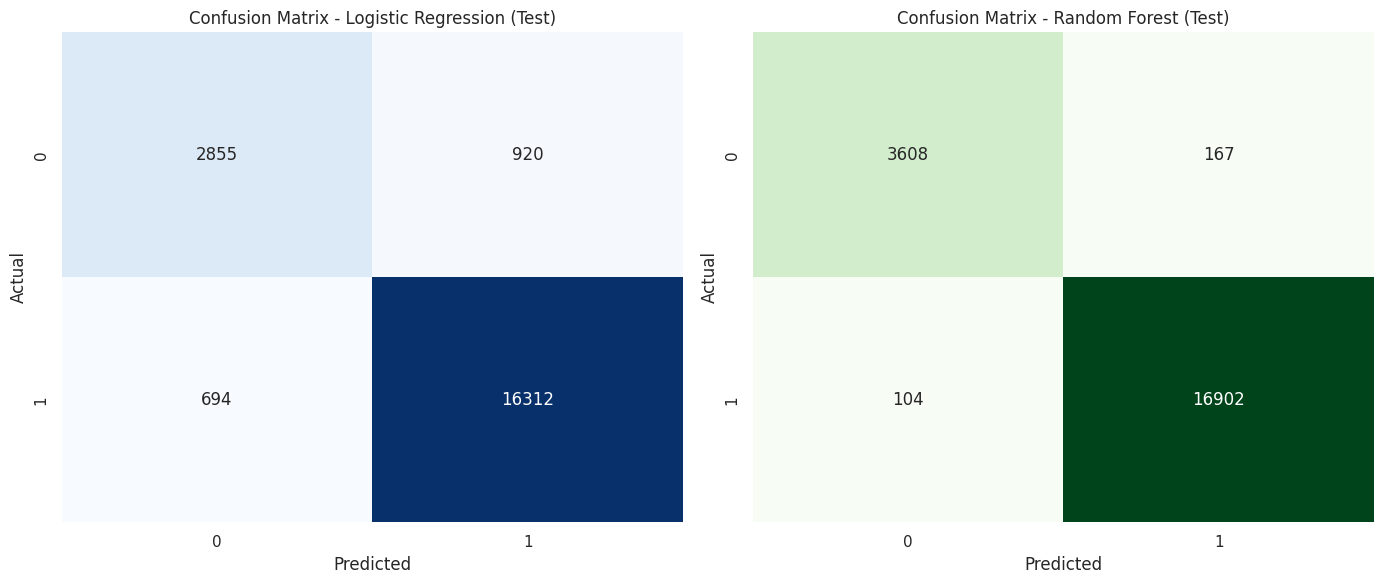

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode remaining categorical columns
label_enc = LabelEncoder()
for col in ['Destination', 'Continent']:  # Add any other relevant columns here
    encoded_data[col] = label_enc.fit_transform(encoded_data[col])

# Define features (X) and target (y)
X = encoded_data.drop(columns=['Satisfied', 'id', 'Ref'])
y = encoded_data['Satisfied'].map({'Y': 1, 'N': 0})  # Convert 'Satisfied' into binary

# Step 2: Split the dataset into training (60%), validation (20%), and testing (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 25% of 80%

# Step 3: Train models
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the validation set
y_val_pred_log_reg = log_reg.predict(X_val)
y_val_pred_rf = rf_model.predict(X_val)

# Step 5: Evaluate the models on the validation set
# Logistic Regression evaluation
log_reg_val_acc = accuracy_score(y_val, y_val_pred_log_reg)
log_reg_val_conf_matrix = confusion_matrix(y_val, y_val_pred_log_reg)
log_reg_val_class_report = classification_report(y_val, y_val_pred_log_reg)

# Random Forest evaluation
rf_val_acc = accuracy_score(y_val, y_val_pred_rf)
rf_val_conf_matrix = confusion_matrix(y_val, y_val_pred_rf)
rf_val_class_report = classification_report(y_val, y_val_pred_rf)

# Step 6: Print evaluation results for validation set
print("Logistic Regression Performance on Validation Set:")
print(f"Accuracy: {log_reg_val_acc:.4f}")
print("Confusion Matrix:\n", log_reg_val_conf_matrix)
print("Classification Report:\n", log_reg_val_class_report)

print("\nRandom Forest Performance on Validation Set:")
print(f"Accuracy: {rf_val_acc:.4f}")
print("Confusion Matrix:\n", rf_val_conf_matrix)
print("Classification Report:\n", rf_val_class_report)

# Step 7: Evaluate the models on the test set
y_test_pred_log_reg = log_reg.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)

# Logistic Regression evaluation on test set
log_reg_test_acc = accuracy_score(y_test, y_test_pred_log_reg)
log_reg_test_conf_matrix = confusion_matrix(y_test, y_test_pred_log_reg)
log_reg_test_class_report = classification_report(y_test, y_test_pred_log_reg)

# Random Forest evaluation on test set
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)
rf_test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
rf_test_class_report = classification_report(y_test, y_test_pred_rf)

# Step 8: Print evaluation results for test set
print("Logistic Regression Performance on Test Set:")
print(f"Accuracy: {log_reg_test_acc:.4f}")
print("Confusion Matrix:\n", log_reg_test_conf_matrix)
print("Classification Report:\n", log_reg_test_class_report)

print("\nRandom Forest Performance on Test Set:")
print(f"Accuracy: {rf_test_acc:.4f}")
print("Confusion Matrix:\n", rf_test_conf_matrix)
print("Classification Report:\n", rf_test_class_report)

# Step 9: Visualize the confusion matrix for both models
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(log_reg_test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(rf_test_conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Random Forest (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
